### Name: Mobina Salimipanah
### StudentId: 99109788

# Librarires

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_california_housing


# Load Dataset

In [2]:
data = fetch_california_housing()
X = np.array(data.data)
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [3]:
#TODO
class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = []

    def initialize_centroids(self, data):
        """Randomly pick data points as initial centroids"""
        initial_indices = np.random.choice(len(data), self.n_clusters, replace=False)
        self.centroids = data[initial_indices]

    def assign_clusters(self, data):
        """Assign each data point to the closest centroid"""
        distances = np.sqrt(((data - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def update_centroids(self, data, labels):
        """Update centroids to be the mean of points in each cluster"""
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids

    def fit(self, data):
        """Fit the KMeans model to the data"""
        self.initialize_centroids(data)
        for _ in range(self.max_iter):
            labels = self.assign_clusters(data)
            new_centroids = self.update_centroids(data, labels)
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
        return self.centroids, labels

    def compute_sse(self, data):
        _, labels = self.fit(data)
        return sum(np.min(np.sum((data - self.centroids[:, np.newaxis])**2, axis=2), axis=0))

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=5, max_iter=1000)
centroids, labels = kmeans.fit(x_data)


# Use elbow method and silhouette method to choose optimal cluster numbers

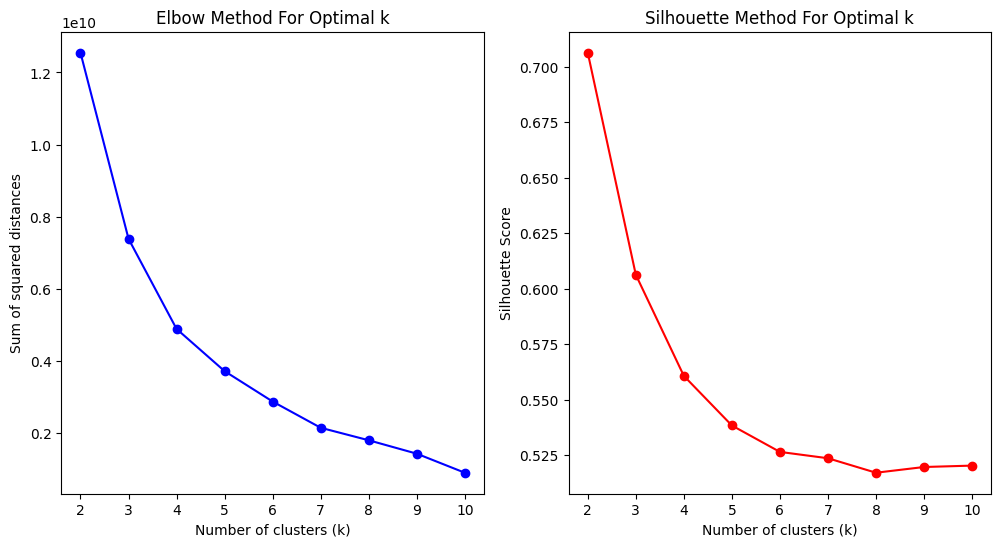

In [7]:
def compute_sse(kmeans, data):
    """ Compute Sum of Squared Errors (SSE) for a fitted KMeans model """
    labels = kmeans.assign_clusters(data)
    distances = np.sqrt(((data - kmeans.centroids[labels])**2).sum(axis=1))
    return np.sum(distances**2)

k_values = range(2, 11)
sse_values = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    centroids, labels = kmeans.fit(X)
    sse_values.append(compute_sse(kmeans, X))
    silhouette_scores.append(silhouette_score(X, labels))


# Plotting the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, sse_values, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')



# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()


# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

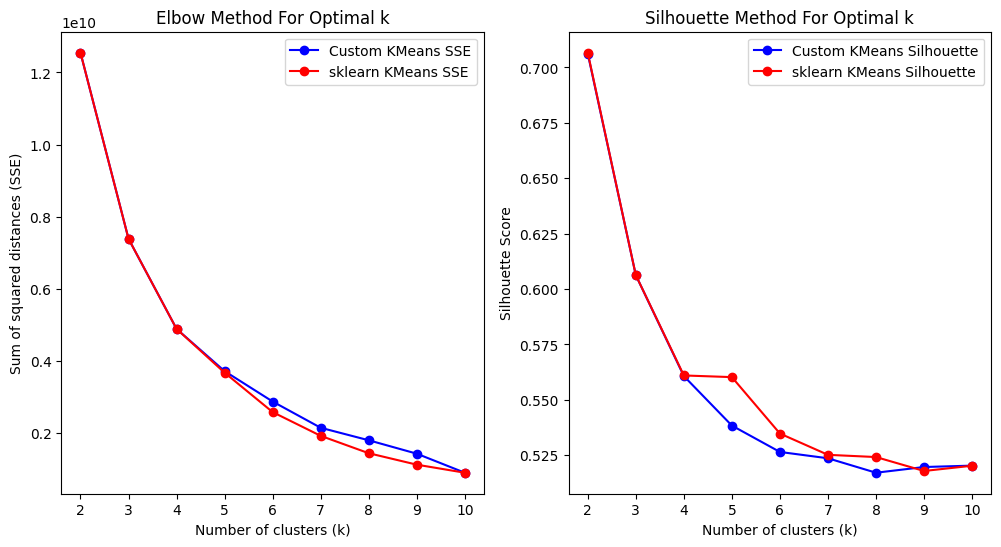

In [ ]:
#TODO
from sklearn.cluster import KMeans as SklearnKMeans

k_values = range(2, 11)
sklearn_sse = []
sklearn_silhouette = []

for k in k_values:

    # Sklearn KMeans
    sklearn_kmeans = SklearnKMeans(n_clusters=k)
    sklearn_labels = sklearn_kmeans.fit_predict(X)
    sklearn_sse.append(sklearn_kmeans.inertia_)
    sklearn_silhouette.append(silhouette_score(X, sklearn_labels))

# Plotting the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, sse_values, 'bo-', label='Custom KMeans SSE')
plt.plot(k_values, sklearn_sse, 'ro-', label='sklearn KMeans SSE')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method For Optimal k')
plt.legend()

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'bo-', label='Custom KMeans Silhouette')
plt.plot(k_values, sklearn_silhouette, 'ro-', label='sklearn KMeans Silhouette')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.legend()

plt.show()

### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference



### Elbow Method Analysis:
- **Custom KMeans SSE**: The slope of the SSE graph for the custom KMeans shows a significant drop that starts to level off around k=4, but the decline in SSE is still noticeable as k increases further. However, the change in the rate of decline becomes less pronounced beyond k=4.
- **Sklearn KMeans SSE**: For `sklearn`'s KMeans, the SSE similarly decreases sharply and begins to plateau around k=4, although it also continues to decline gradually for larger k values.

**Optimal k (Elbow Method)**:
- **Custom KMeans**: The most apparent elbow is seen at k=4, suggesting this as the optimal cluster count where adding more clusters begins to yield diminishing returns in terms of SSE reduction.
- **Sklearn KMeans**: Also indicates k=4 as the point where the reduction in SSE starts to plateau, making it the optimal choice based on this method.

### Silhouette Method Analysis:
- **Custom KMeans Silhouette**: Starts highest at k=2 and then decreases sharply, which suggests that k=2 is optimal for maximum separation and cohesion within clusters.
- **Sklearn KMeans Silhouette**: Also shows the highest score at k=2, followed by a decline as the number of clusters increases, indicating that the clusters are most distinct and appropriately separated at k=2.

**Optimal k (Silhouette Method)**:
- For both the custom and `sklearn` implementations, the highest silhouette scores occur at **k=2**. This indicates that two clusters provide the most substantial average silhouette score, meaning that the clusters are well-separated and dense.

### Conclusion and Comparison:
- **Elbow Method**: Both algorithms suggest that k=4 is the optimal number of clusters, indicating that beyond this point, the additional decrease in SSE is less substantial and may not justify more clusters.
- **Silhouette Method**: Both algorithms show the highest silhouette score at k=2, implying the best separation and cohesion at this number of clusters.

**Why the Difference?**
- The discrepancy between the Elbow and Silhouette methods can often be attributed to their focus: the Elbow Method looks at overall variance reduction within clusters, while the Silhouette Method evaluates how well-separated and cohesive the clusters are.
- Deciding which k to use should be influenced by the specific needs of your analysis. If the goal is to maximize the distinctiveness of the clusters (important in scenarios where clear differentiation is needed), k=2 would be preferable. If the aim is to balance this with a reasonable reduction in within-cluster variance, then k=4 might be more appropriate.

Ultimately, the choice between k=2 and k=4 would depend on the particular context and objectives of your clustering analysis.

### would you prefer elbow method for determining optimal cluster number or silhouette method?
#### I prefer silhouette method because in elbow method sometimes it's hard to say where is the elbow point but silhouette method is more deterministic rather than elbow method.